# NOAA API Tutorial

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from dotenv import load_dotenv
import os
import UCSmpl
from tqdm import tqdm

load_dotenv()

True

In [2]:
api_key = os.environ.get('NOAA_API_KEY')

# V1

In [31]:
v1_base_url = "https://www.ncei.noaa.gov/access/services/data/v1?dataset=local-climatological"

In [186]:
# test_Url = "https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-marine&dataTypes=WIND_DIR,WIND_SPEED&stations=AUCE&startDate=2016-01-01&endDate=2016-01-02&boundingBox=90,-180,-90,180&format=json"
# test_Url = "https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-summary-of-the-year&dataTypes=DP01,DP05,DP10,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,SNOW,PRCP&stations=ASN00084027&startDate=1952-01-01&endDate=1970-12-31&includeAttributes=true&format=json"
# test_Url = "https://www.ncei.noaa.gov/access/services/search/v1/data?dataset=daily-summaries&startDate=2010-01-01T00:00:00&endDate=2016-12-31T23:09:59&boundingBox=35.462327,-82.563951,35.412327,-82.513951&dataTypes=PRCP&stations=USW00003812&limit=10&offset=0&format=json"
# test_Url = "https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=AUCE&startDate=2016-01-01&endDate=2016-01-02&boundingBox=90,-180,-90,180&format=json"
station = '72446003947'
startDate = "2000-01-01"
endDate = "2024-01-01"
data_types = "HourlyWindSpeed,HourlyWindDirection,HourlyDryBulbTemperature,HourlyWetBulbTemperature,HourlyRelativeHumidity,HourlyPrecipitation"
test_Url = f"https://www.ncei.noaa.gov/access/services/data/v1?dataset=local-climatological-data&dataTypes={data_types}&stations={station}&startDate={startDate}&endDate={endDate}&format=json"

In [187]:
r = requests.get(test_Url)
r

<Response [200]>

In [188]:
df = pd.DataFrame(r.json())

In [189]:
df.columns

Index(['DATE', 'REPORT_TYPE', 'HourlyWindDirection', 'STATION',
       'HourlyRelativeHumidity', 'SOURCE', 'HourlyPrecipitation',
       'HourlyWindSpeed', 'HourlyDryBulbTemperature',
       'HourlyWetBulbTemperature'],
      dtype='object')

In [190]:
df

,DATE,REPORT_TYPE,HourlyWindDirection,STATION,HourlyRelativeHumidity,SOURCE,HourlyPrecipitation,HourlyWindSpeed,HourlyDryBulbTemperature,HourlyWetBulbTemperature
0,2000-01-01T00:00:00,SY-MT,180,72446003947,55,3,0.00,12,42,36
1,2000-01-01T00:53:00,FM-15,180,72446003947,53,C,0.00,13,43,NaN
2,2000-01-01T01:00:00,NSRDB,NaN,72446003947,NaN,9,NaN,NaN,NaN,NaN
3,2000-01-01T01:53:00,FM-15,180,72446003947,55,C,0.00,13,42,NaN
4,2000-01-01T02:00:00,NSRDB,NaN,72446003947,NaN,9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
355714,2024-01-01T21:00:00,FM-12,210,72446003947,88,4,NaN,8,26,25
355715,2024-01-01T21:53:00,FM-15,210,72446003947,91,7,0.00,7,24,23
355716,2024-01-01T22:53:00,FM-15,200,72446003947,88,7,0.00,7,23,22
355717,2024-01-01T23:53:00,FM-15,200,72446003947,96,7,0.00,8,22,22


In [191]:

df2 = df.set_index(['DATE','REPORT_TYPE']).xs((slice(None), 'FM-15'))

In [195]:
df3 = df2[['HourlyWetBulbTemperature']].fillna(-999).replace('*',-999)

In [196]:
df3['HourlyWetBulbTemperature'].unique()

array([-999, '63', '64', '65', '67', '68', '69', '71', '72', '73', '74',
       '70', '66', '62', '61', '60', '59', '75', '76', '77', '78', '58',
       '57', '56', '55', '54', '50', '49', '48', '47', '46', '45', '44',
       '43', '51', '52', '53', '80', '79', '81', '82', '83', '42', '41',
       '40', '39', '38', '37', '36', '35', '33', '32', '31', '34', '30',
       '29', '28', '26', '25', '24', '27', '23', '22', '21', '20', '19',
       '18', '17', '16', '15', '14', '13', '11', '12', '10', '8', '6',
       '5', '4', '3', '2', '9', '7', '1', '-2', '-3', '-4', '0', '-1',
       '-5', '-6', '-9', '84', '-7', '-11', '-10', '-8', '-12', '85'],
      dtype=object)

In [197]:
df3['HourlyWetBulbTemperature'] = df3['HourlyWetBulbTemperature'].apply(int)

In [198]:
df3.isnull().sum()

HourlyWetBulbTemperature    0
dtype: int64

In [199]:
df3 = df3.replace(-999, np.nan).interpolate('linear')

In [200]:
df3.index = pd.to_datetime(df3.index)

C:\Users\sdotson\AppData\Local\Temp\ipykernel_15268\493124226.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


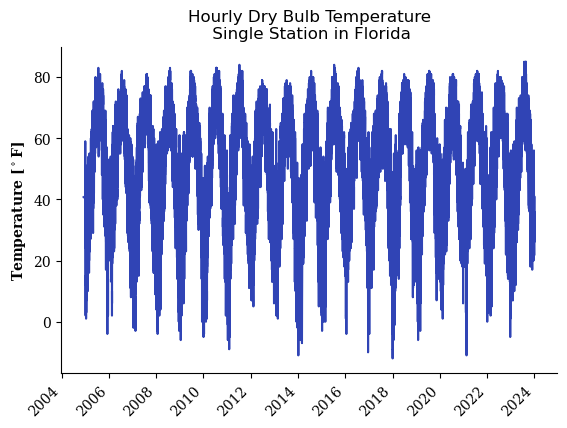

In [243]:
with plt.style.context('ucs_light'):
    df3.iloc[8760*5:,:].plot(legend=False)
    # labels = [pd.to_datetime(label[?]).strftime('%Y-%m-%d %h:%T:%S') for label in plt.gca().xaxis.get_ticklabels()]
    # labels
    # plt.gca().set_xticklabels(plt.gca().xaxis.get_ticklabels().strftime('%Y-%m-%d %h:%T:%S'), rotation=90)
    ax=plt.gca()
    ax.set_ylabel('Temperature [$^\circ$F]')
    ax.set_xlabel('')
    ax.set_title('Hourly Dry Bulb Temperature\n Single Station in Florida', fontdict=dict(family='sans serif'))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [207]:
df3.interpolate('spline', order=2).isna().sum()

HourlyWetBulbTemperature    12757
dtype: int64

<Axes: xlabel='DATE'>

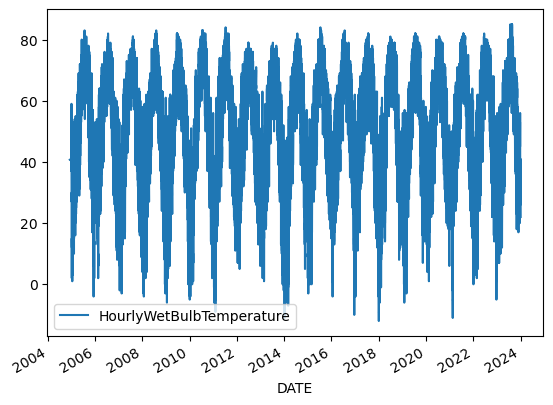

In [213]:
df3.iloc[8760*5:,:].plot()

In [219]:
df3.index.freq

In [226]:
df3.iloc[8760*5:,:].resample('h').mean().interpolate('linear')

,HourlyWetBulbTemperature
DATE,
2004-12-06 09:00:00,40.724633
2004-12-06 10:00:00,40.725081
2004-12-06 11:00:00,40.725530
2004-12-06 12:00:00,40.725978
2004-12-06 13:00:00,40.726427
...,...
2024-01-01 19:00:00,26.000000
2024-01-01 20:00:00,25.000000
2024-01-01 21:00:00,23.000000


In [240]:
s = seasonal_decompose(df3.iloc[8760*5:,:].resample('h').mean().interpolate('linear'), period=8760)

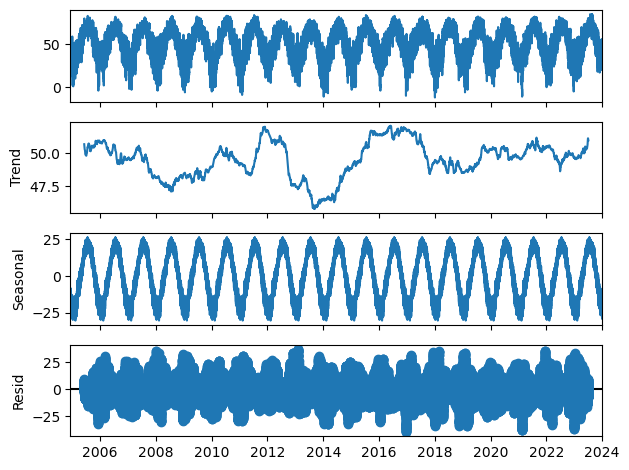

In [241]:
s.plot()
plt.show()

## Get station ID

In [8]:
dataset = 'local-climatological-data'

url = f"https://www.ncei.noaa.gov/access/services/search/v1/data?dataset={dataset}"
url += "&dataTypes=HourlyWetBulbTemperature,HourlyWindSpeed"
url += "&limit=1000&offset=0"
url += "&startDate=2023-01-01"
url += "&endDate=2024-01-01"

req = requests.get(url, data=None, json=None, headers=None)
req

<Response [200]>

In [129]:
from time import sleep

In [130]:
frames = []

MAX_PAGES = 100
for page in tqdm(range(1,MAX_PAGES), unit='page'):
    dataset = 'local-climatological-data'

    url = f"https://www.ncei.noaa.gov/access/services/search/v1/data?dataset={dataset}"
    url += "&dataTypes=HourlyWetBulbTemperature,HourlyWindSpeed"
    url += f"&limit=1000&offset={1000*page}"
    url += "&startDate=2023-01-01"
    url += "&endDate=2024-01-01"
    
    
    # making get request using the emissions/apportioned/hourly endpoint
    streamingResponse = requests.get(url)
    if streamingResponse.status_code == 500:
        print("Too many requests in a short span, sleep for 10 seconds")
        sleep(10)
        continue
    
    results = streamingResponse.json()['results']
    df = pd.DataFrame(results)
    
    frames.append(df)
    
    if len(results) < 1000:
        print('Reached the end!')
        break

  9%|▉         | 9/99 [00:29<03:52,  2.59s/page]

Too many requests in a short span, sleep for 10 seconds


 10%|█         | 10/99 [01:10<10:27,  7.05s/page]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [131]:
streamingResponse.status_code

503

In [121]:
streamingResponse

<Response [500]>

In [122]:
combined = pd.concat(frames, axis=0)

In [123]:
for station in combined.stations.values:
    try:
        x = station[0]['id']
    except:
        print(station[0].keys())
    # print(station['name'])

In [124]:
station_id = [station[0]['id'] for station in combined.stations.values]

In [127]:
combined

,tar,endDate,boundingPoints,filePath,stations,dataTypes,fileSize,centroid,name,location,id,dataTypesCount,startDate
0,2023.tar.gz,2023-12-31T23:59:59,"[{'point': [-81.99391, 26.91847]}]",/data/local-climatological-data/access/2023/72...,[{'dataTypes': [{'coverage': 0.149700598802395...,"[{'dateRange': {'start': None, 'end': None}, '...",7568165,"{'point': [-81.99391, 26.91847]}",72203412812.csv,"{'coordinates': [-81.99391, 26.91847], 'type':...",2023.tar.gz:72203412812.csv,97,2023-01-01T00:53:00
1,2023.tar.gz,2023-12-31T23:59:59,"[{'point': [-96.01292, 36.7664]}]",/data/local-climatological-data/access/2023/72...,[{'dataTypes': [{'coverage': 0.124750499001996...,"[{'dateRange': {'start': None, 'end': None}, '...",7311574,"{'point': [-96.01292, 36.7664]}",72356503959.csv,"{'coordinates': [-96.01292, 36.7664], 'type': ...",2023.tar.gz:72356503959.csv,97,2023-01-01T00:53:00
2,2023.tar.gz,2023-12-31T23:59:59,"[{'point': [-85.18352, 30.83696]}]",/data/local-climatological-data/access/2023/74...,[{'dataTypes': [{'coverage': 0.124750499001996...,"[{'dateRange': {'start': None, 'end': None}, '...",7561885,"{'point': [-85.18352, 30.83696]}",74776003818.csv,"{'coordinates': [-85.18352, 30.83696], 'type':...",2023.tar.gz:74776003818.csv,97,2023-01-01T00:00:00
3,2023.tar.gz,2023-12-31T23:59:59,"[{'point': [-117.27651, 33.12993]}]",/data/local-climatological-data/access/2023/72...,[{'dataTypes': [{'coverage': 0.149700598802395...,"[{'dateRange': {'start': None, 'end': None}, '...",8511486,"{'point': [-117.27651, 33.12993]}",72292703177.csv,"{'coordinates': [-117.27651, 33.12993], 'type'...",2023.tar.gz:72292703177.csv,97,2023-01-01T00:31:00
4,2023.tar.gz,2023-12-31T23:59:59,"[{'point': [-76.49399, 37.13216]}]",/data/local-climatological-data/access/2023/72...,[{'dataTypes': [{'coverage': 0.137225548902195...,"[{'dateRange': {'start': None, 'end': None}, '...",7951683,"{'point': [-76.49399, 37.13216]}",72308693741.csv,"{'coordinates': [-76.49399, 37.13216], 'type':...",2023.tar.gz:72308693741.csv,97,2023-01-01T00:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023.tar.gz,2023-12-31T21:59:59,"[{'point': [66.8333333, 50.2166667]}]",/data/local-climatological-data/access/2023/35...,[{'dataTypes': [{'coverage': 30.79821856800274...,"[{'dateRange': {'start': None, 'end': None}, '...",1485020,"{'point': [66.8333333, 50.2166667]}",35363099999.csv,"{'coordinates': [66.8333333, 50.2166667], 'typ...",2023.tar.gz:35363099999.csv,16,2023-01-01T00:00:00
996,2023.tar.gz,2023-12-31T23:59:59,"[{'point': [134.7166666, -29.0333333]}]",/data/local-climatological-data/access/2023/95...,"[{'dataTypes': [{'coverage': 100.0, 'endDate':...","[{'dateRange': {'start': None, 'end': None}, '...",6118215,"{'point': [134.7166666, -29.0333333]}",95458099999.csv,"{'coordinates': [134.7166666, -29.0333333], 't...",2023.tar.gz:95458099999.csv,16,2023-01-01T00:30:00
997,2023.tar.gz,2023-12-31T23:59:59,"[{'point': [26.7, 45.55]}]",/data/local-climatological-data/access/2023/15...,"[{'dataTypes': [{'coverage': 98.8925676447083,...","[{'dateRange': {'start': None, 'end': None}, '...",4942126,"{'point': [26.7, 45.55]}",15285099999.csv,"{'coordinates': [26.7, 45.55], 'type': 'point'}",2023.tar.gz:15285099999.csv,16,2023-01-01T00:00:00
998,2023.tar.gz,2023-12-31T18:59:59,"[{'point': [-9.3, 10.3833333]}]",/data/local-climatological-data/access/2023/61...,[{'dataTypes': [{'coverage': 20.49348869088416...,"[{'dateRange': {'start': None, 'end': None}, '...",968084,"{'point': [-9.3, 10.3833333]}",61829099999.csv,"{'coordinates': [-9.3, 10.3833333], 'type': 'p...",2023.tar.gz:61829099999.csv,16,2023-01-01T00:00:00


In [125]:
len(np.unique(station_id))

5033

In [126]:
station_id

['72203412812',
 '72356503959',
 '74776003818',
 '72292703177',
 '72308693741',
 '72635794815',
 '72342953920',
 '72290303131',
 '74704003102',
 '72343653922',
 '74594693786',
 '72250512904',
 '72340703953',
 '72250812957',
 '72227953852',
 '72562624091',
 '72446313988',
 '72525404851',
 '72303593740',
 '72494023234',
 '72354403954',
 '72227953852',
 '72481523257',
 '72303793765',
 '72787094119',
 '72635794815',
 '72434753904',
 '72429613841',
 '72552594949',
 '72303593740',
 '72201412818',
 '72580524172',
 '72250812957',
 '72202912888',
 '72781024243',
 '72536614825',
 '70274025331',
 '72525404851',
 '72218113837',
 '72510314712',
 '72381603159',
 '72649994971',
 '74455094982',
 '72407513735',
 '72619614610',
 '72744014858',
 '72383023187',
 '72668594052',
 '72662024090',
 '72203412812',
 '72272093026',
 '72657994963',
 '72434503966',
 '72252412972',
 '72677624036',
 '72205712854',
 '70371025333',
 '74776003818',
 '72250512904',
 '72223513838',
 '72244753903',
 '72669024057',
 '726575

In [40]:
combined.stations.values[0][0].keys()

dict_keys(['dataTypes', 'name', 'id'])

In [9]:
results = req.json()['results']

In [13]:
df=pd.DataFrame(results)

In [25]:
from shapely.geometry import Point

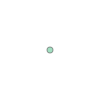

In [26]:
Point(df.centroid.values[0]['point'])

In [21]:
pd.DataFrame(df.stations.values[1])

,dataTypes,name,id
0,"[{'coverage': 100.0, 'endDate': '2023-12-31T23...","KANSAS CITY INTERNATIONAL AIRPORT, MO US",72446003947


In [15]:
df.location.values

array([{'coordinates': [-87.51465, 38.05015], 'type': 'point'},
       {'coordinates': [-94.73087, 39.29747], 'type': 'point'},
       {'coordinates': [-80.67361, 41.25478], 'type': 'point'},
       {'coordinates': [-94.16824, 36.01027], 'type': 'point'},
       {'coordinates': [-108.54081, 39.13437], 'type': 'point'},
       {'coordinates': [-73.12664, 41.16424], 'type': 'point'},
       {'coordinates': [-92.49207, 43.904], 'type': 'point'},
       {'coordinates': [-111.98921, 46.60444], 'type': 'point'},
       {'coordinates': [-90.52365, 41.44816], 'type': 'point'},
       {'coordinates': [-117.52796, 47.62168], 'type': 'point'},
       {'coordinates': [-114.09376, 46.92076], 'type': 'point'},
       {'coordinates': [-84.35809, 46.47998], 'type': 'point'},
       {'coordinates': [-104.5057, 38.28868], 'type': 'point'},
       {'coordinates': [-96.37948, 42.39169], 'type': 'point'},
       {'coordinates': [-116.24062, 43.56705], 'type': 'point'},
       {'coordinates': [-98.22275, 44